## Word embeddings

In [3]:
import numpy as np

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

from tensorflow.keras.layers import Embedding

#from keras.layers.embeddings import Embedding

In [4]:
# define documents
docs = ['Well done!',
        'Good work',
        'Great effort',
        'nice work',
        'Excellent!',
        'Weak',
        'Poor effort!',
        'not good',
        'poor work',
        'Could have done better.']

# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

#### using count vect

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer()

In [7]:
X = vectorizer.fit_transform(docs)

In [8]:
X.toarray()

array([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [9]:
input_dim = X.shape[1]  # Number of features
input_dim

14

In [10]:
model = Sequential()
model.add(Dense(units=5, input_dim=input_dim, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 75        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# fit the model
model.fit(X.toarray(), labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(X.toarray(), labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))




Accuracy: 80.000001


#### using keras embedding

we can encode each document with integers. 

This means that as __input__, the __Embedding layer__ will have sequences of integers. 

Keras provides the one_hot () function, which creates a hash of each word as effective integer coding. 

We estimate the size of the dictionary to be 50, which is much more than is necessary to reduce the likelihood of collisions of matches from the hash function.

In [13]:
vocab_size   = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]

encoded_docs

[[33, 28],
 [6, 7],
 [7, 15],
 [26, 7],
 [5],
 [31],
 [8, 15],
 [1, 6],
 [8, 7],
 [12, 47, 28, 16]]

The sequences have different lengths, and therefore we will fill all input sequences up to length 4. 

We can do this with the built-in function Keras __pad_sequences()__.

In [14]:
max_length  = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs

array([[33, 28,  0,  0],
       [ 6,  7,  0,  0],
       [ 7, 15,  0,  0],
       [26,  7,  0,  0],
       [ 5,  0,  0,  0],
       [31,  0,  0,  0],
       [ 8, 15,  0,  0],
       [ 1,  6,  0,  0],
       [ 8,  7,  0,  0],
       [12, 47, 28, 16]])

Now we are ready to define our __Embedding layer__ as part of our neural network model. 

The model is a simple binary classification model. 

It is important to note that the output from the __Embedding layer__ will be 4 vectors of 8 dimensions each, one for each word.

In [15]:
# define the model
model = Sequential()

model.add(Embedding(input_dim   = vocab_size, 
                    output_dim  = 2, 
                    input_length= max_length))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [16]:
# summarize the model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 2)              100       
                                                                 
 flatten (Flatten)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


 the output of the Embedding layer is a 4 × 8 matrix, and this data is compressed to a 32-element vector by a Flatten layer.

In [17]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(padded_docs, labels, epochs=150, verbose=0)

# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


## Understaning keras embedding

It must specify 3 arguments:

__input_dim__: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

__output_dim__: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

__input_length__: This is the length of input sequences, as you would define for any input layer of a Keras model. 

E.g. below we define an Embedding layer with 
- a vocabulary of 20 (e.g. integer encoded words from 0 to 199, inclusive), 
- a vector space of 4 dimensions in which words will be embedded, and 
- input documents that have 5 words each.

Ex

In [18]:
model = Sequential()
model.add(Embedding(input_dim=200, output_dim=4, input_length=5))

the model will take as __input__ an integer __matrix__ of __size(batch, input_length)__.

the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).

In [19]:
model.output_shape

(None, 5, 4)

where None is the batch dimension.

In [20]:
input_array = np.random.randint(low=15, high=25, size=(1, 1))
input_array

array([[22]])

In [22]:
model.compile('rmsprop', 'mse')

embeddings=model.predict([11, 177, 12, 44])

1/1 [==============================] - 0s 153ms/step


In [23]:
print("Shape of embeddings : ", embeddings.shape)
print(embeddings)

Shape of embeddings :  (4, 4)
[[ 0.02859474 -0.01319576 -0.03017988 -0.01136176]
 [ 0.01115873 -0.04568116 -0.02238288 -0.02811598]
 [ 0.04129679 -0.04393137  0.0349781   0.03514368]
 [ 0.00941688 -0.02267722  0.02911348  0.03748237]]


Ex

In [24]:
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=2, input_length=2))

In [25]:
input_array = np.random.randint(low=15, high=25, size=(1, 2))
input_array

array([[24, 19]])

In [26]:
model.compile('rmsprop', 'mse')

In [28]:
embeddings=model.predict(np.array([[1, 4], [5, 6], [567, 51]]))
embeddings

1/1 [==============================] - 0s 41ms/step


array([[[-0.02816148, -0.04200964],
        [ 0.02098951, -0.01550486]],

       [[ 0.03628905, -0.04714073],
        [ 0.00905062,  0.0018991 ]],

       [[ 0.01830446,  0.02149126],
        [-0.0214268 ,  0.00730853]]], dtype=float32)

#### Summary

- the output vectors are __not__ computed from the input using any mathematical operation. 

- Instead, each input integer is used as the index to access a table that contains all posible vectors. 

- That is the reason we need to specify the __size of the vocabulary__ as the first argument (so the table can be initialized).

- Let's see a simple example. Our training set consists only of two phrases:

    - Hope to see you soon
    - Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewritten as:

[0, 1, 2, 3, 4]

[5, 1, 2, 3, 6]

In [24]:
model = Sequential()
model.add(Embedding(7, 2, input_length=5))

- The first argument (7) is the number of distinct words in the training set. 
- The second argument (2) indicates the size of the embedding vectors. 
- The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors:

In [25]:
model.predict(np.array([[5, 1, 2, 3, 6]]))

array([[[ 0.01974035,  0.03888771],
        [-0.03703699,  0.04754427],
        [-0.00244965, -0.00420637],
        [-0.03980761, -0.02184142],
        [ 0.02774726, -0.00508906]]], dtype=float32)

[[[-0.01974838,  0.0280619 ], [ 0.0257035 ,  0.04889334],  [-0.01299459,  0.01630559], [-0.00580703, -0.0438586 ], [ 0.00106598, -0.01027669]]],

The contents of the table that relates indexes to embedding vectors (i.e., the weights of the embedding layer) are initialized at random and then optimized by the training algorithm (e.g., Gradient Descent).

In [26]:
model.layers[0].get_weights()

[array([[-0.01647147,  0.00831801],
        [-0.03703699,  0.04754427],
        [-0.00244965, -0.00420637],
        [-0.03980761, -0.02184142],
        [ 0.03271464, -0.0073713 ],
        [ 0.01974035,  0.03888771],
        [ 0.02774726, -0.00508906]], dtype=float32)]

## Example

In [27]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [32]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', 
                                          split = (tfds.Split.TRAIN, tfds.Split.TEST), 
                                          with_info=True, 
                                          as_supervised=True, 
                                          data_dir=r'D:\MYLEARN\datasets\keras\datasets'
                                     )

In [33]:
encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [31]:
encoder.vocab_size

8185

In [247]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches  = test_data.shuffle(1000).padded_batch(10)

In [248]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  62,   27, 7391, ...,    0,    0,    0],
       [  12,   31,   56, ...,    0,    0,    0],
       [  12,  258,  217, ...,    0,    0,    0],
       ...,
       [  12,  258,   67, ...,    0,    0,    0],
       [2960, 5184, 2960, ..., 4623,   66, 7975],
       [ 809,  110,   12, ...,    0,    0,    0]], dtype=int64)

In [250]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [251]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5198 - accuracy: 0.6793 - val_loss: 0.3593 - val_accuracy: 0.8550
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2897 - accuracy: 0.8828 - val_loss: 0.3200 - val_accuracy: 0.8800
Epoch 3/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.2347 - accuracy: 0.9091 - val_loss: 0.3420 - val_accuracy: 0.8350
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1999 - accuracy: 0.9243 - val_loss: 0.3407 - val_accuracy: 0.8600
Epoch 5/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1793 - accuracy: 0.9325 - val_loss: 0.4881 - val_accuracy: 0.8050
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 0.1634 - accuracy: 0.9388 - val_loss: 0.4642 - val_accuracy: 0.8250
Epoch 7/10
2500/2500 [==============================] - 9s 4ms/step - loss: 0.1450 - accuracy: 0.9471 - val_loss: 0.2695 - val_accu

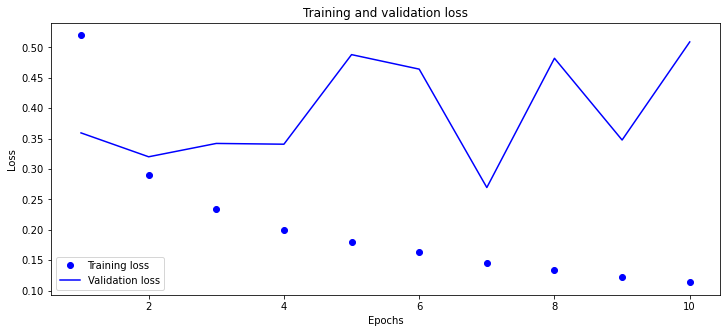

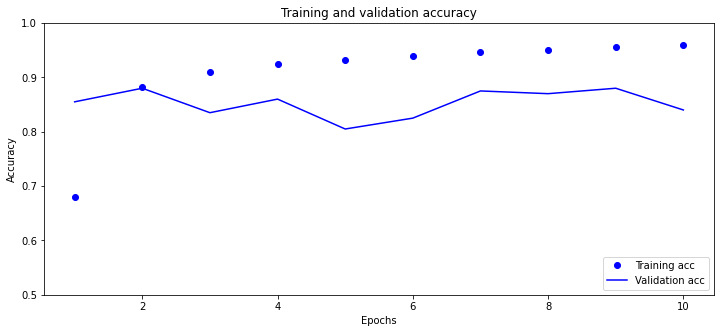

In [256]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.figure(figsize=(12, 5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1));

#### Retrieve the learned embeddings
Next, let's retrieve the word embeddings learned during training. This will be a matrix of shape (vocab_size, embedding-dimension).

In [258]:
e = model.layers[0]

weights = e.get_weights()[0]

print(weights.shape) # shape: (vocab_size, embedding_dim)

(8185, 16)


In [259]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

%load_ext tensorboard

In [260]:
from tensorboard.plugins import projector
